<center><h1>Observational Astrophysics I</h1><br><br>Laboratory exercise - HR diagram of a cluster<br>

<br><br>By A.G.M. Pietrow<br><br>based on the Stockholm University IRAF lab by Magnus Gålfalk & Andreas Sandberg <br>and the Leiden University lab by Olivier Burggraaff, A.G.M. Pietrow and Sascha Zeegers<br><br>Stockholm Observatory 2021</center>

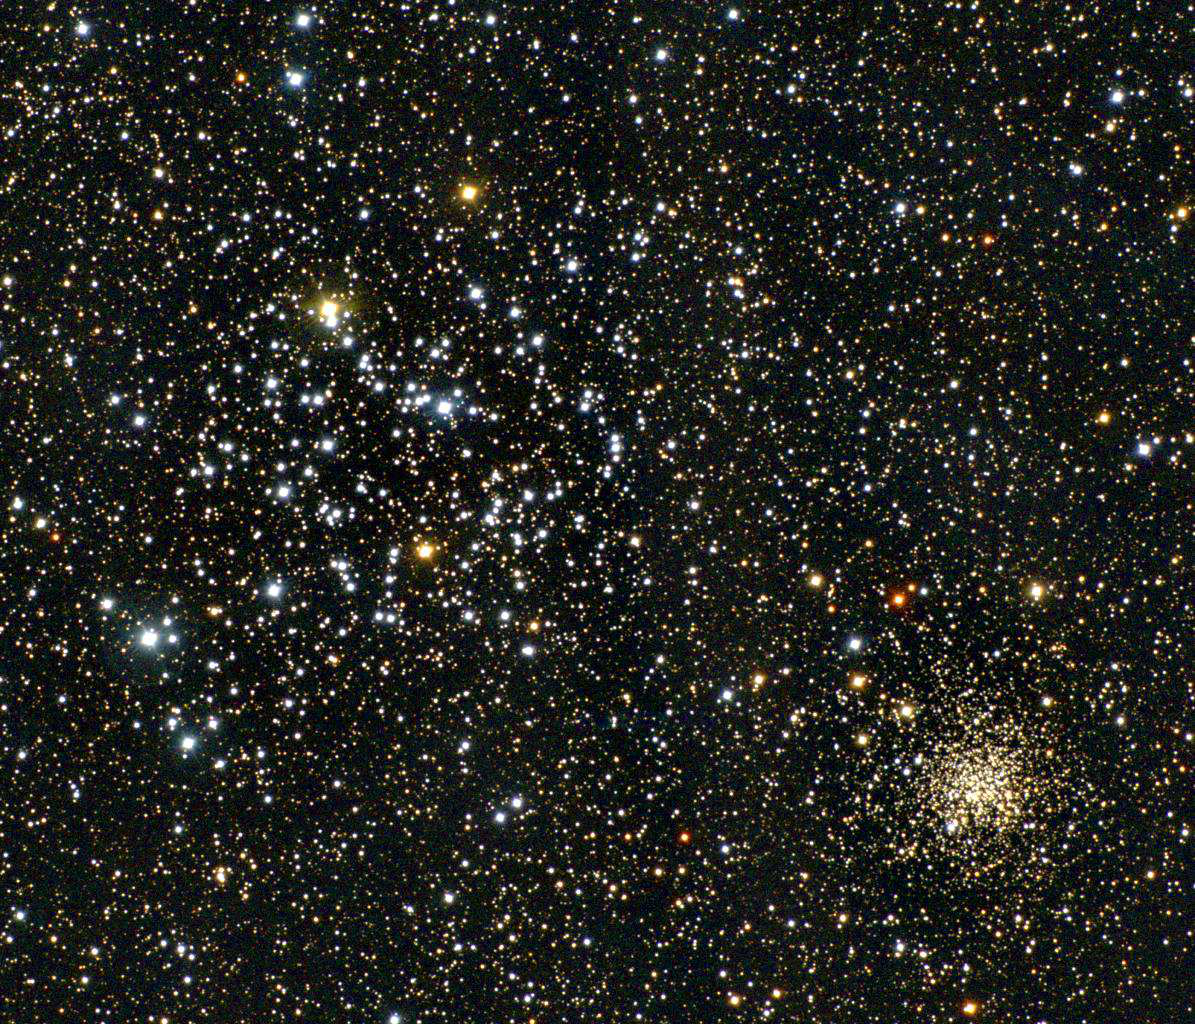
<center>M35 - Image credit: N.A.Sharp/NOAO/AURA/NSF</center>

## 1. Introduction

This is an exercise in observational astrophysics, using the one-metre telescope at Stockholmobservatory to observe a cluster of stars. While the observations themselves are a good exercise,we will also use the images to derive some physical properites of both the stars and the cluster. 

Please familiarize yourself with the contents of the PDF document before continuing. 


During this practical we will use this jupyter notebook and SAOImage DS9. The former being an implementation of the well known Python programing language, where text and code can be placed into a single document. The code is normal Python, but can be split up into individual *cells*. Each cell can be seen as an idividual piece of code, that can be ran individually. Different cells can communicate with one another, allowing the user to easily test code. In this way you can import data in one cell and manipulate it in the next, which means that you don't have to import it each time you are testing the reduction. To modify a cell, one only needs to click on it. To run the cell, click the 'play' button in the top or use the keyboard combination *ctrl*+*enter*. Plots and prints will always appear underneath the relevant cell, as is demonstrated below. 

SAOImage DS9 is an astronomical imaging and data visualization application. DS9 supports FITS images and binary tables, multiple frame buffers, region manipulation, and many scale algorithms and colormaps. It provides for easy communication with external analysis tasks and is highly configurable and extensible via XPA and SAMP.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

print("You will see a plot under this text!")

plt.rcParams['figure.dpi'] = 200  #This line will make this and all future plots bigger

x = np.arange(0, 2*np.pi, 0.01) # x-coordinates
plt.plot(x, np.sin(x)) # plot of x and the sine of x
plt.xlim(0, 2*np.pi) # change the x limit of the plot
plt.ylim(-1.05, 1.05) # chang ethe y limit of the plot
plt.title("Sine") # give the plot a title
plt.xlabel("x") # label the x-axis 
plt.ylabel("sin(x)") # label the y-axis
plt.show() # show the plot



## 2. Exercises
### 4.1 Calibration Frames
Before we can work with our observations, we have to set up and apply the three calibration frames discussed in the theory above.

Both the observational and calibrational data are saved in the so-called *.fits* format. This stands for *Flexible Image Transport System* (FITS) and has been the standard in astronomy since 1981. Our FITS-files  contain two parts: an image (the data) and a header that contains all metadata like, who make the observation, what the exposure time was, when it was taken, etc. 

We can import both image and header into python with help from the astropy package. See below for an example. 

---

**Note: You do not have to incorporate the questions in section 4.1 into your report, but you do need to explain what you did and use the results for the rest of the lab.**

--- 

In [ ]:
from astropy.io import fits as f
path = "data/T11/M35/" #Change this if your data is elsewhere!

flat = f.open(path+"raw-T11-m35-20200219-000148-B-BIN1-W-060-001.fit")[0] #note the 0!

#The zero is to choose the 0th extention of the fits file.



We can look at the header like this.

In [ ]:
flat.header

Individual elements from the header can be extracted by calling their *keyword*. For example the telescope filter is saved under the keyword 'FILTER'.

In [ ]:
print('The filter of the image is: ', flat.header["FILTER"])

The data itself can be accessed in a similar way, giving back a numpy array. This makes it easy to work with the datawithout for-loops etc.  

In [ ]:
plt.imshow(flat.data,cmap='gray',origin='lower',vmax=3000)
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.title('A flat image')
plt.show()

### Question 1:

Print the following information one of the dark images. 
* Exposure time in seconds
* The size of the image in pixels
* The Universal Time on which the image is taken
* The Longitude and Latitude of the telescope

In [ ]:
## Your code here! ##


### Master Bias
**Note:** If we are working with remote data from iTelescope.com, then we do not make a master Bias. 

Now that we know how to work with fits files, we can focus on obtaining a Master Bias. We achieve this by taking the average of all of our individual bias frames. 

First we need to be able to read the bias frames and work with this, This can be done manually or with help of a list. 
The latter can be done by using the *glob* package.

This created a list with all the files that start with 'bias'. We can now simply make a for-loop, open each file and take the average of the lot. One way of doing this is to simply add all the frames together and then divide the result by the amount of bias frames. However, if you have a better idea, feel free to use that!


In [ ]:
import astropy.io.fits as f
import glob
path = "bias/T11/"
filelist = glob.glob(path+'*bias*')


bias0 = f.getdata(filelist[0])   #Open first bias image
master_bias = np.empty([2672,4008])  #make an empty array of the same size

## ------------------------------------------------------------------- ##
## Make a loop that goes through the bias list and creates an average. ##
## ------------------------------------------------------------------- ##


    
plt.imshow(master_bias)
plt.title('Master Bias')
plt.colorbar()




Now compare the standard deviation of a single bias frame to the master bias.

In [ ]:
##
#Your code here
##


### Master Dark
The dark current frame from our observations contains a bias, like all exposures read out from the CCD, which needs to be removed. Therfore we will first remove the bias from each dark frame, after which we will average them in much the same way as we did with the dark. An easy way to do this while avoiding the need to save the corrected darks is to subtract the bias after opening the image. 

Start with making a list of darks (e.g. type 'ls dark* > dark.list'),  and repeat the process above.

**Note: ** We have darks with various integration times, so make sure not to stack those!

In [ ]:
path = 'darks/T11/'
dark_images = glob.glob(path+'*60*')


master_dark = np.zeros_like(master_bias)  #both should be the same size

## ------------------------------------------------------------------- ##
## Make a loop that goes through the dark list and creates an average. ##
## try something like 'dark_reduced = dark - master_bias'              ##
## ------------------------------------------------------------------- ##



plt.imshow(master_dark,origin='lower', vmax=1800, vmin=1700)
plt.colorbar()



### Master Flats
We will need to make two master flats, one for the B filter and one for the V filter. Each flat field, as read out from the CCD, contains a bias and has some dark current. Therefore we will subtract the master dark and the master bias from each of these flat fields before again averaging them to get a single flat for the B and V band. 

Unlike the other two calibration frames, the master flat requires to be normalized to itself in order to facilitate proper scaling.

In [ ]:
## ------------------------------------------------------------------- ##
## write your own script for doing this here .                         ##
## ------------------------------------------------------------------- ##
#Remember to scale the master dark to the shorter exposure time!



plt.subplot(121)
plt.imshow(master_flatB,origin='lower')
plt.colorbar(fraction=.03)
plt.title('flatB')
plt.subplot(122)
plt.imshow(master_flatV, origin='lower')
plt.colorbar(fraction=.03)
plt.title('flatV')
plt.tight_layout()

***
## Calibration

Now that we have the main calibration frames we can apply them to our data and remove most of the systematics caused by local factors. 

We review the recepies below.:

\begin{align}
Bias_m &= \frac{1}{n_{bias}}\sum bias \\
Dark_m &= \frac{1}{n_{dark}} \sum (dark - bias_m) \\
Flat_m &= \left( (flat - bias) - \frac{dark_m \cdot t_{flat}}{{t_{dark}}} \right) \: / \: \left< (flat - bias) - \frac{dark_m \cdot t_{flat}}{{t_{dark}}} \right> \\
Light &=  (light - bias) - \frac{dark_m \cdot t_{light}}{t_{dark} }\\
science &= Light\: / \: Flat_m
\end{align}

With $x_m$ being the master, $t_i$ the relevant exposure time, $<x>$ the average of $x$ and $science$ the final reduced observation.

These are not the only corrections that are generally done, for example we also have; background subtraction, bad pixel maps, linearity corrections and more. But for simplicity we ignore that in this lab. 


***
### Question 2:

Apply the above recipie to obtain science frames of your observations.

In [ ]:
## Your code here!





Now we will save the science image that you have made into its own fits-file. This is done by using the 'writeto' function of the fits package. Use the example below for a simple file without a header, or copy the header of the raw data into the reduced data if you want to expermiment with that.


In [ ]:
#f.writeto(filename, data, header=None, overwrite=1)



***

## Counting photons

Now that we have calibrated our science images, we can finally work with them. The end goal is to calculate the magnitude of a number of stars of the cluster in B and V. However, these cannot just be read from the fits file, but the pixel counts can. 

For a certain amount of stars we want to find which pixels belong to them, since they are smeared out over a larger area on the detector. We do this by using DS9 and opening the relevant image in it. You can open the program by typing 'ds9 &' in the terminal, or by finding it in the start menu. 

Once you have opened DS9, you can open one of your science images by clicking 'file->open' and selecting the image. Now go to the *scale* tab and select *log* and *zscale*. Right-click anywhere on the image and move your mouse to change the contrast of the image. Play around with this until you have a good image of the cluster.

Now you can draw *regions* around the stars by clicking *region* in the *edit* tab. Click anywhere on the image to create a green circle and click on it again to drag and resize it. Try to get a circle around the biggest, non-oversaturated star first that is as tight as possible, then put circles of the same size around the other stars. (This is to get the same amount of the PSF for each star. Dimmer stars might get a low S/N due to this.)

Try to have atleast 30 stars and include a screenshot of the image with regions into your report. 
**Note: ** B and V is not always aligned, so make sure if the x,y coordinates are the same and either shift the regions for B or use np.roll() to align both images.

***

Now find one or more empty spots in the image and place a region there. We will use this region, or the average of these regions to estimate the background. Make sure to do this *after* having selected all the stars, as the regions will be saved in order of creation and you do not want to keep lists. 

Now export the region file from DS9 by going to the *region* tab and slecting *save*. In the dialouge box that pops up, make sure to set *Coordinate System* to *physical* and not *wcs*.

***
This .reg file contains the coordinates and radius of each circle. We have a specialized function for reading that into python inside the custom sp.py library called *regextract*. 

In [ ]:
%run pos

x, y, r = regextract("ds9.reg") # change ds9.reg with your own filename/path

print("x-coordinates:")

print(x)

Note: If you have questions about a function, try to first look at the documentation. This is done by typing 'help(function)'. Often the documentation will explain what the function does,provide examples and sometimes list the most common mistakes. This can be especially useful for complex functions with a lot of keywords. 

Speaking of such functions, we will now take a look at the *aper* function in the *pos* library. This will show us that this function is designed to extract counts from an image at a certain coordinate and with a certain radius. It even gives an error estimate on these values.

This function can do a lot for you and has been used by profesional astronomers since before 1989 to do aperture photometry. However, we will only use it to get source counts and therefore will turn off most its options. 

Here is an example of the function in action.

In [ ]:
xe = 132
ye = 415
re = int(35) # Example region, feel free to replace this with your own


# science is the calibrated image, change this if you named it differently
flux, fluxerr = aper(scienceB, xc=xe, yc=ye, apr=re, phpadu=1., setskyval=0, exact= True, verbose=False )

flux, fluxerr

*flux* and *fluxerr* contain the counts for this star and the error on it. We could use *sky* and *Skyerr* to subtract the background, but since this cluster is so densly populated we will do it by hand.

***
### Question 4

Use *aper* to find the counts for each star, the background region(s) and the estimated error on this number.

Note: x,y,r should be fed into aper as single numbers, it will give you the wrong answer if you give an array instead. Therefore you will need to use a forloop or list comprehentions

In [ ]:
n = 3 #the amount of regions
flux = np.zeros(n)
eflux = np.zeros(n) # empty arrays to input your data


# Your code here!


***
We now have the counts for each star, the background region(s) and the error on them. Use this background measurment to subtract the background from the stars, so that we are only left with star light. We use the following equation for that:

$ F_{star} = C_{star} - \frac{C_{background}}{A_{background}} \times A_{star} $

Here $F_{star}$ is the stellar flux in counts, $C$ the raw counts for each region and $A$ the surface of each region in pixels. (Remember the equation of a circle for this.)

***

### Question 5

Calculate for each star the flux according to the formula given above. Propagate the error by assuming that there is no error on $A$, but only the two $C$'s

In [ ]:
# Your code here!


Save the values in a text file and print them here also. 

e.g. 
Star 1: Flux +- Eflux
Star 2: Flux +- Eflux
Star 3: Flux +- Eflux
Star 4: Flux +- Eflux
...

In [ ]:
# Your code here!

### 3. Questions to be answered
From  the  reduced  data  of  your  observations (see  previous  chapter)  you  should  now  have  a photometry list of roughly 30 selected stars (including the calibration star).  This list should contain photometry (in ADU/s units) for both the B and V filter. Use this to answer the questions inside the PDF.

***